# Jaringan Syaraf Tiruan Menggunakan Algoritma Backpropagation untuk Memprediksi Prestasi Siswa

## Import Data

In [306]:
import pandas as pd

data_indo = pd.read_excel('dataset/d-indo.xlsx', index_col='nisn')
data_mtk = pd.read_excel('dataset/d-matematika.xlsx', index_col='nisn')
data_inggris = pd.read_excel('dataset/d-inggris.xlsx', index_col='nisn')
data_indo

,nama,jurusan,s1,s2,s3,s4,s5
nisn,,,,,,,
3049699097,Fatikhatul Khusna,TKI,80,85,80,80,84
61630300,Abdul mufid,TKI,80,88,80,80,82
43998191,Ade Firmansyah,TKI,80,88,80,80,82
3040508393,A. FAIZAL UMAM,TKI,80,88,80,80,82
3067947891,Akmal Fatahilah,TKI,80,88,80,80,82
...,...,...,...,...,...,...,...
56376210,Sepita Hanatasya,BDP,80,88,80,80,79
3065869370,SHERLIE AMELIA RAMADANI,BDP,80,88,80,80,79
66843141,WIDIAWATI,BDP,80,88,80,80,79


In [307]:
data_indo.describe()

,s1,s2,s3,s4,s5
count,88.000000,88.000000,88.000000,88.0,88.000000
mean,80.056818,87.875000,80.090909,80.0,81.420455
std,0.533002,0.907346,0.852803,0.0,1.459976
min,80.000000,80.000000,80.000000,80.0,79.000000
25%,80.000000,88.000000,80.000000,80.0,82.000000
50%,80.000000,88.000000,80.000000,80.0,82.000000
75%,80.000000,88.000000,80.000000,80.0,82.000000
max,85.000000,88.000000,88.000000,80.0,88.000000


In [308]:
data_mtk.describe()

,s1,s2,s3,s4,s5
count,88.000000,88.000000,88.000000,88.000000,88.000000
mean,79.534091,79.670455,82.522727,78.011364,80.602273
std,1.027762,1.256904,2.581888,0.106600,0.953394
min,79.000000,78.000000,78.000000,78.000000,79.000000
25%,79.000000,79.000000,83.000000,78.000000,81.000000
50%,79.000000,79.000000,84.000000,78.000000,81.000000
75%,79.250000,79.000000,84.000000,78.000000,81.000000
max,85.000000,82.000000,84.000000,79.000000,85.000000


In [309]:
data_inggris.describe()

,s1,s2,s3,s4,s5
count,88.000000,88.000000,88.000000,88.000000,88.000000
mean,79.318182,79.681818,89.284091,80.977273,75.113636
std,0.652941,1.246102,1.715037,1.761512,1.066004
min,79.000000,79.000000,80.000000,80.000000,75.000000
25%,79.000000,79.000000,89.500000,80.000000,75.000000
50%,79.000000,79.000000,90.000000,80.000000,75.000000
75%,79.250000,79.000000,90.000000,80.000000,75.000000
max,82.000000,82.000000,90.000000,85.000000,85.000000


## Visualisasi data

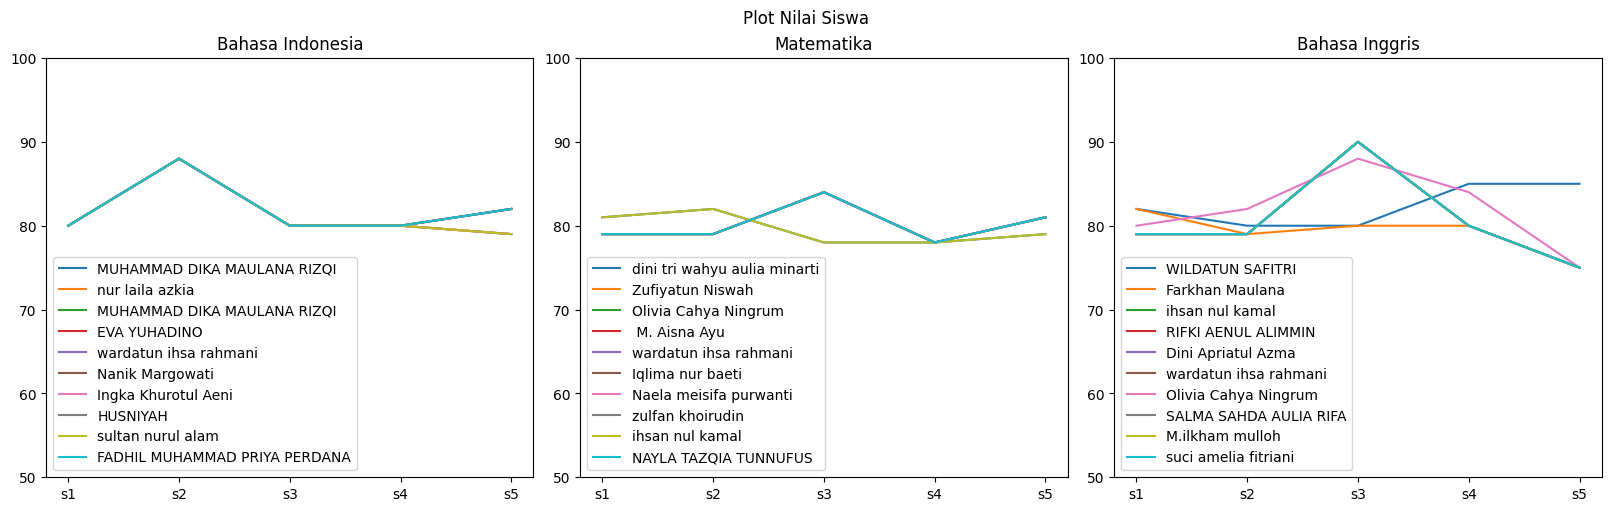

In [310]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data

fig = plt.figure(figsize=(16,5), constrained_layout = True)
fig.suptitle('Plot Nilai Siswa')

label = ["Bahasa Indonesia", "Matematika", "Bahasa Inggris"]
df = [data_indo, data_mtk, data_inggris]

for i in range(3):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(label[i])
    ax.set_ylim(50, 100)
    dtampil = 10
    for j in range(dtampil):
        ax.plot(['s1', 's2', 's3', 's4', 's5'], df[i].sample(dtampil)[['s1', 's2', 's3', 's4', 's5']].values[j], label=df[i].sample(dtampil)['nama'].values[j])
    ax.legend()

## Split Data

In [311]:
X = data_inggris[['s1', 's2', 's3', 's4']].values
y = data_inggris['s5'].values

print(X)
print(y)

[[82 81 85 85]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [82 80 80 85]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [82 79 80 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90

In [312]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70, 4) (18, 4) (70,) (18,)


## Pelatihan

In [313]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

regr = MLPRegressor(random_state=0, max_iter=1000, hidden_layer_sizes=(32, 64), learning_rate_init=0.02, alpha=0.02).fit(X_train, y_train)

y_pred = regr.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))
print(y_pred)
print(y_test)

3.9686744464060073
0.02656204291475926
[76.99215322 76.99215322 76.99215322 76.99215322 76.99215322 76.99215322
 76.99215322 76.99215322 76.99215322 76.99215322 76.99215322 76.99215322
 76.99215322 76.99215322 76.99215322 76.99215322 76.99215322 76.99215322]
[75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75]


In [314]:
preddf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
preddf

,Actual,Predicted
0,75,76.992153
1,75,76.992153
2,75,76.992153
3,75,76.992153
4,75,76.992153
5,75,76.992153
6,75,76.992153
7,75,76.992153
8,75,76.992153
9,75,76.992153


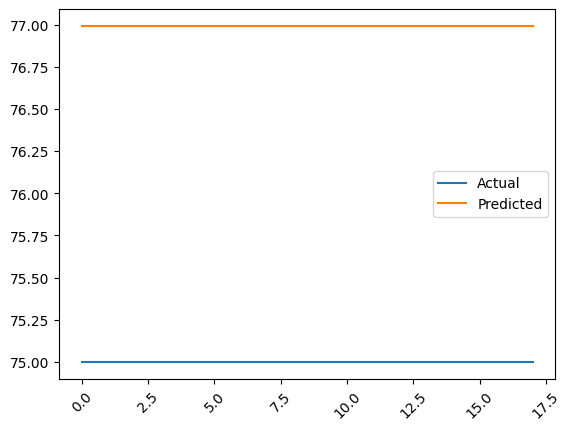

In [315]:
import matplotlib.pyplot as plt

# get last len(y_test) data
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_pred)), y_pred, label='Predicted')
plt.xticks(rotation=45)
plt.legend()

In [316]:
regr.score(X_test, y_test)

0.0